# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


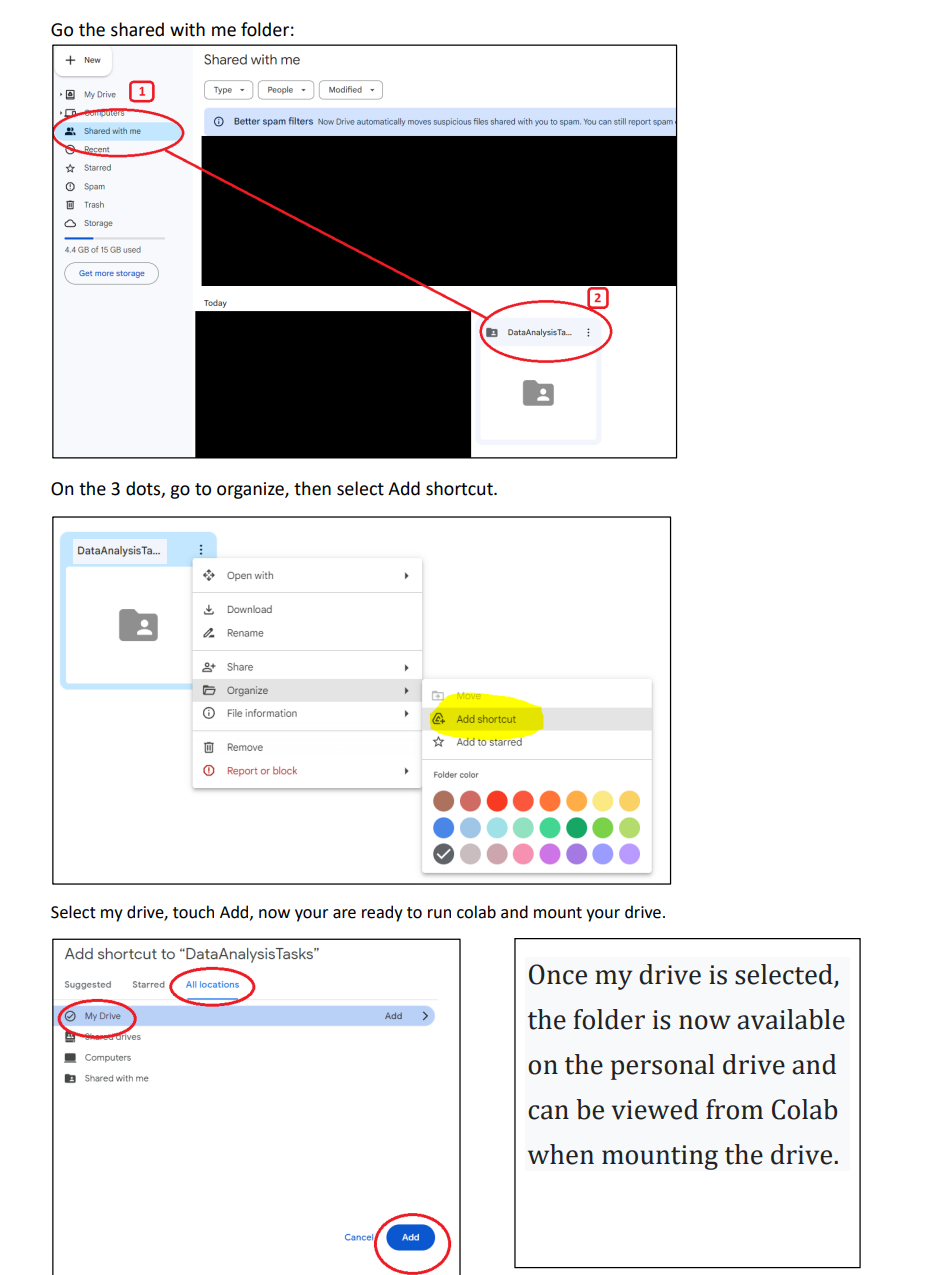

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [3]:
# Import libraries
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook

# Load and preprocess data
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/avocado.csv")


# Calculate the sum of total bags for each region
region_total_bags = df.groupby('region')['Total Bags'].sum().sort_values(ascending=False)

# Select the top 5 regions
top_regions = region_total_bags.head(5).index.tolist()

# Filter the DataFrame for the top 5 regions
df_top_regions = df[df['region'].isin(top_regions)]

# Create a ColumnDataSource
source = ColumnDataSource(df_top_regions)

# Create the figure
p = figure(x_range=top_regions, title="Top 5 Regions by Total Bags", toolbar_location=None, tools="")

# Add bars
p.vbar(x=dodge('region', -0.2, range=p.x_range), top='Total Bags', width=0.2, source=source, legend_label="Total Bags", color="blue")
p.vbar(x=dodge('region', 0.0, range=p.x_range), top='Small Bags', width=0.2, source=source, legend_label="Small Bags", color="green")
p.vbar(x=dodge('region', 0.2, range=p.x_range), top='Large Bags', width=0.2, source=source, legend_label="Large Bags", color="red")

# Add labels and legend
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.title = "Bags"
p.legend.label_text_font_size = '10pt'

# Show the plot
output_notebook()
show(p)